### Import the required libraries

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

### Read the csv files

In [22]:
calorie =  pd.read_csv("calories.csv")

In [23]:
calorie.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [24]:
exercise = pd.read_csv("exercise.csv")

In [25]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [26]:
print(calorie.shape, exercise.shape)

(15000, 2) (15000, 8)


### Combine the two files

As shape of both the files are a match, there should be no errors

In [27]:
data = pd.concat([exercise,calorie["Calories"]],axis=1)

### Get the head, info and descriptive statistics

In [28]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [30]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [31]:
data.shape

(15000, 9)

### Check for any missing or duplicated values

In [32]:
data.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [33]:
data.duplicated().sum()

0

We can drop the UserID column as it does not factor into the model

In [34]:
data.drop(columns=["User_ID"],axis=1, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [36]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### There is one categorical variable in the dataset and this needs to be converted into dummies

In [37]:
data =  pd.get_dummies(data, drop_first=True)

In [38]:
data.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,True
1,20,166.0,60.0,14.0,94.0,40.3,66.0,False
2,69,179.0,79.0,5.0,88.0,38.7,26.0,True
3,34,179.0,71.0,13.0,100.0,40.5,71.0,False
4,27,154.0,58.0,10.0,81.0,39.8,35.0,False


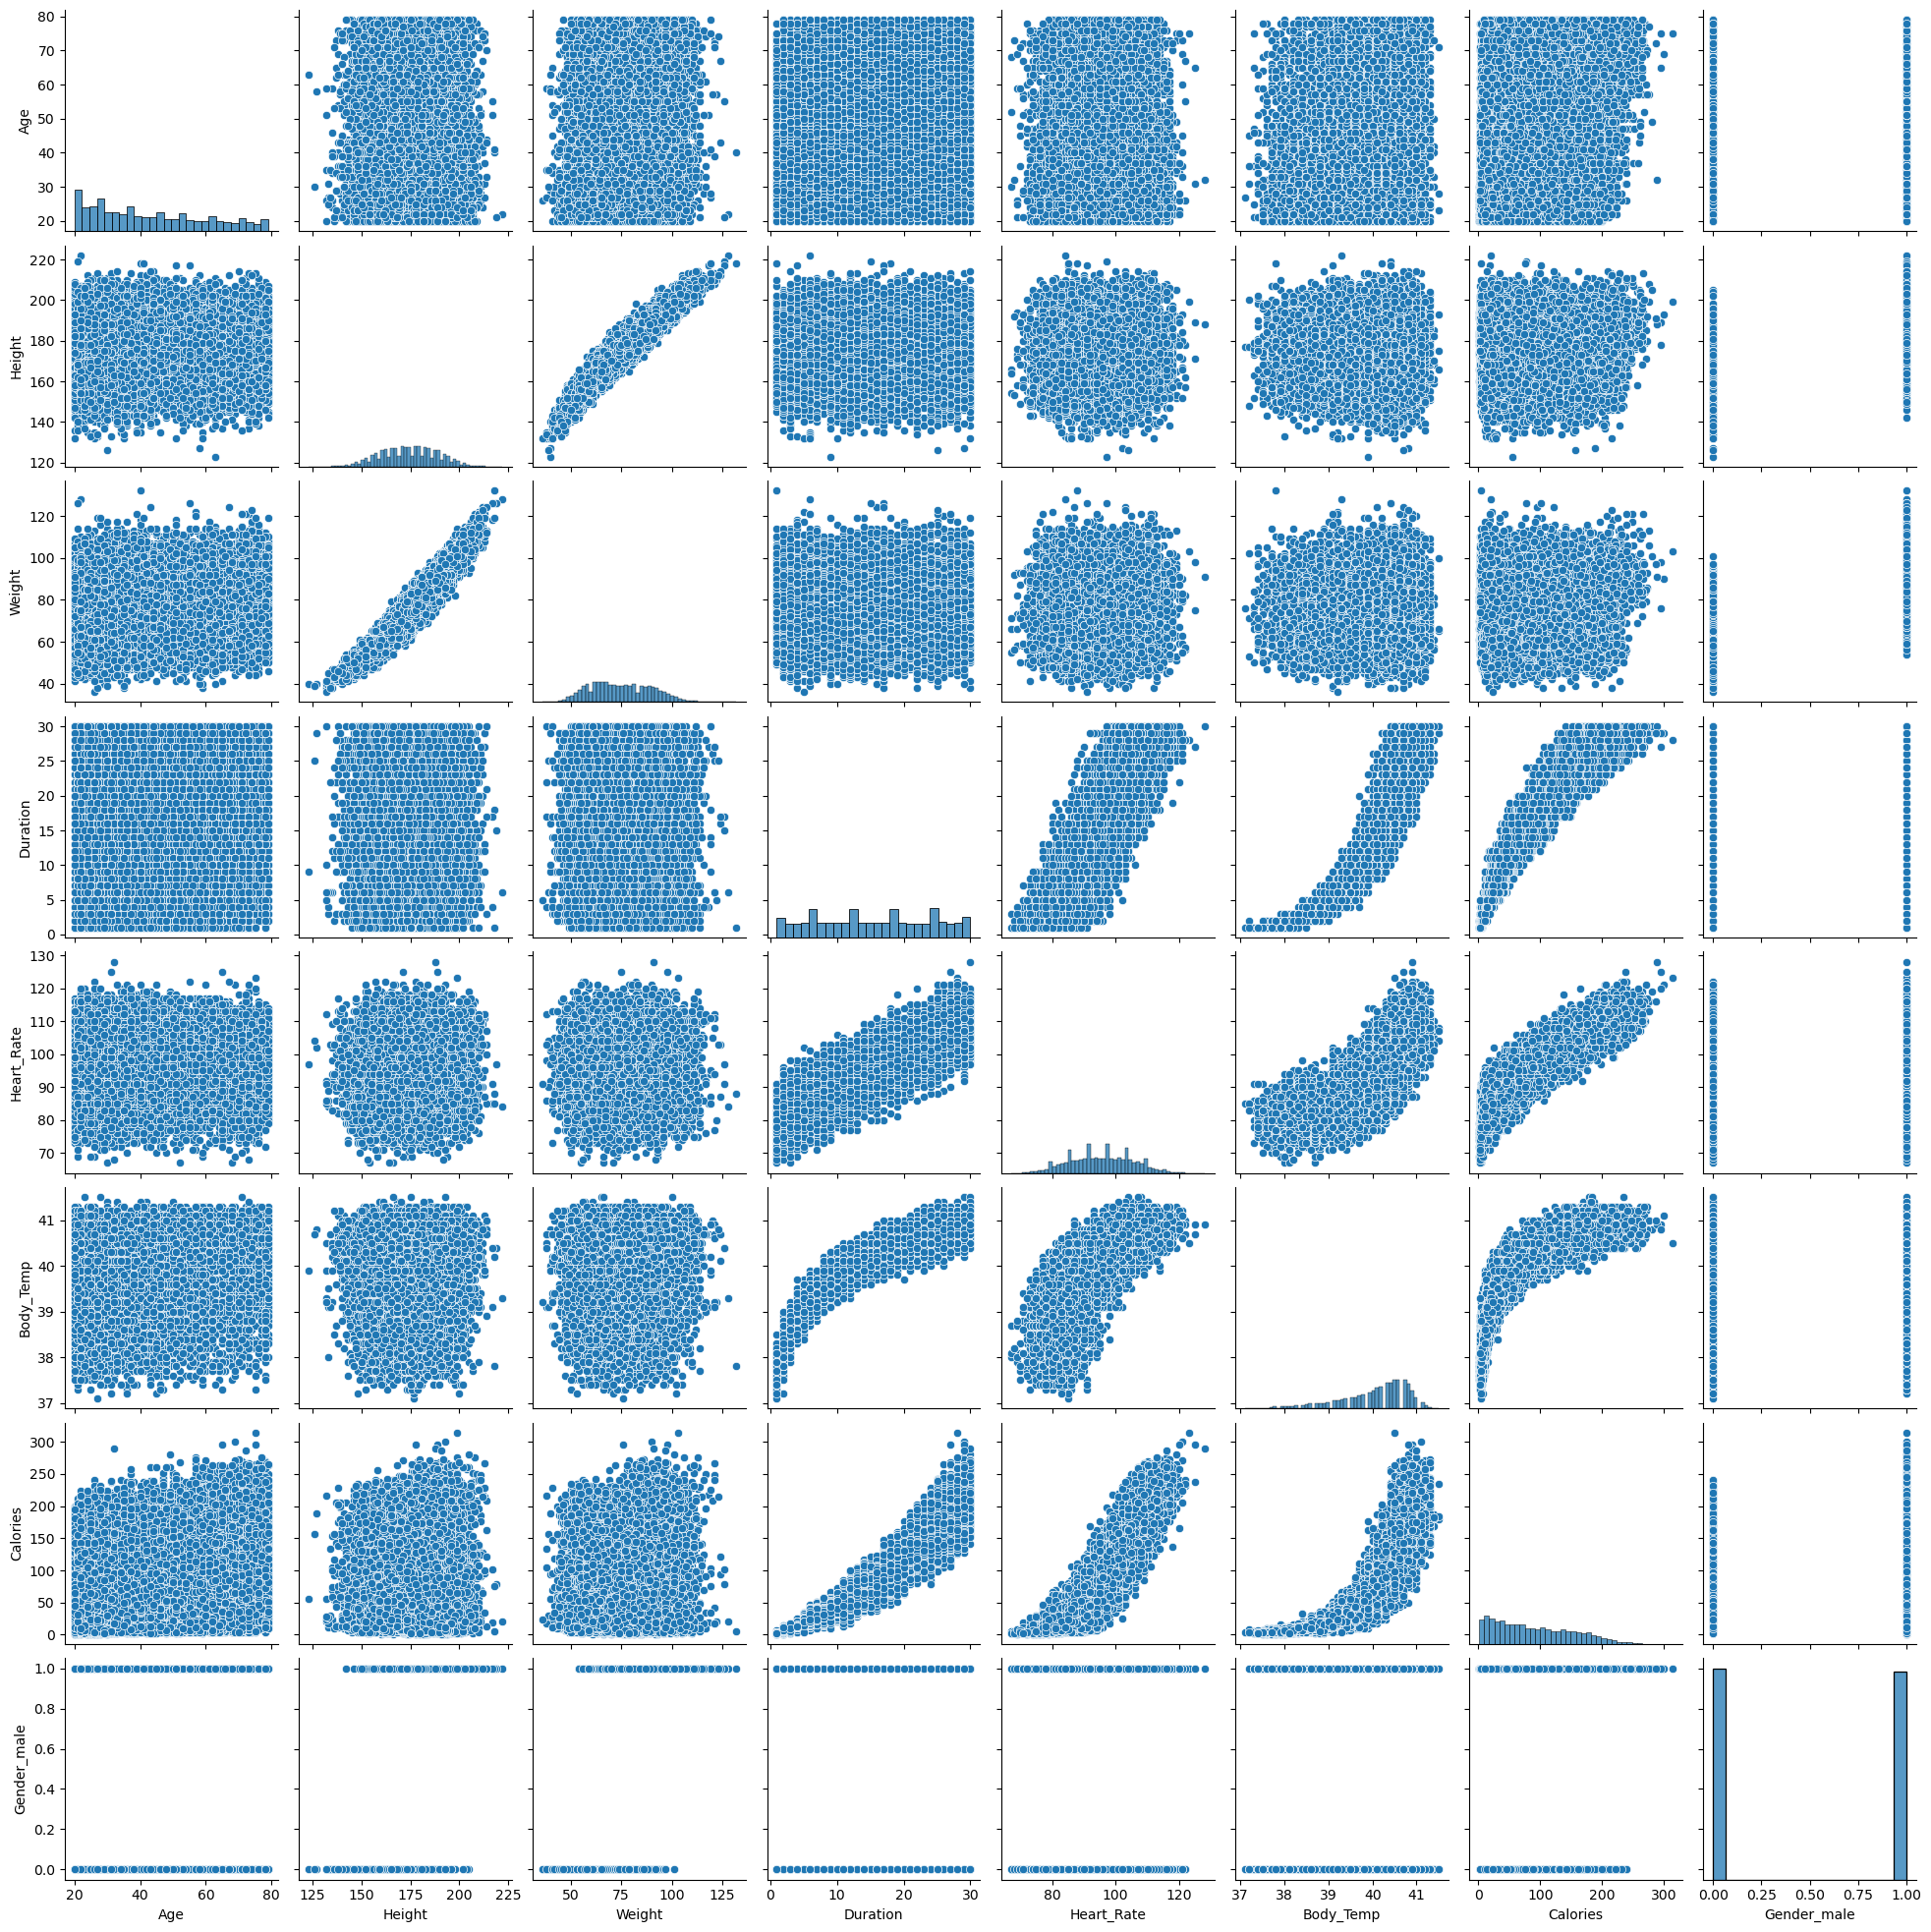

In [39]:
sns.pairplot(data)

Height and weight has some linear relation but  not strictly so we need not remove any variables based on interdependence

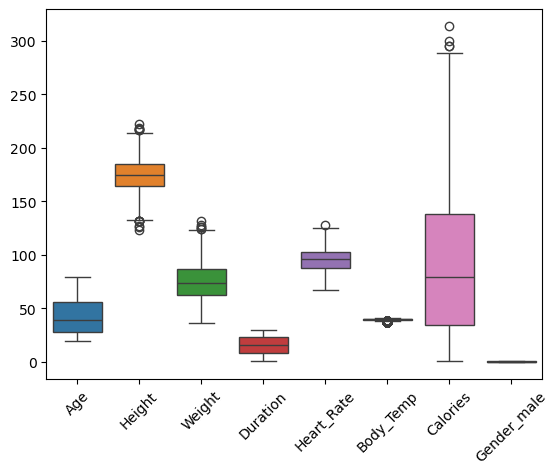

In [40]:
sns.boxplot(data)
plt.xticks(rotation = 45)
plt.show()

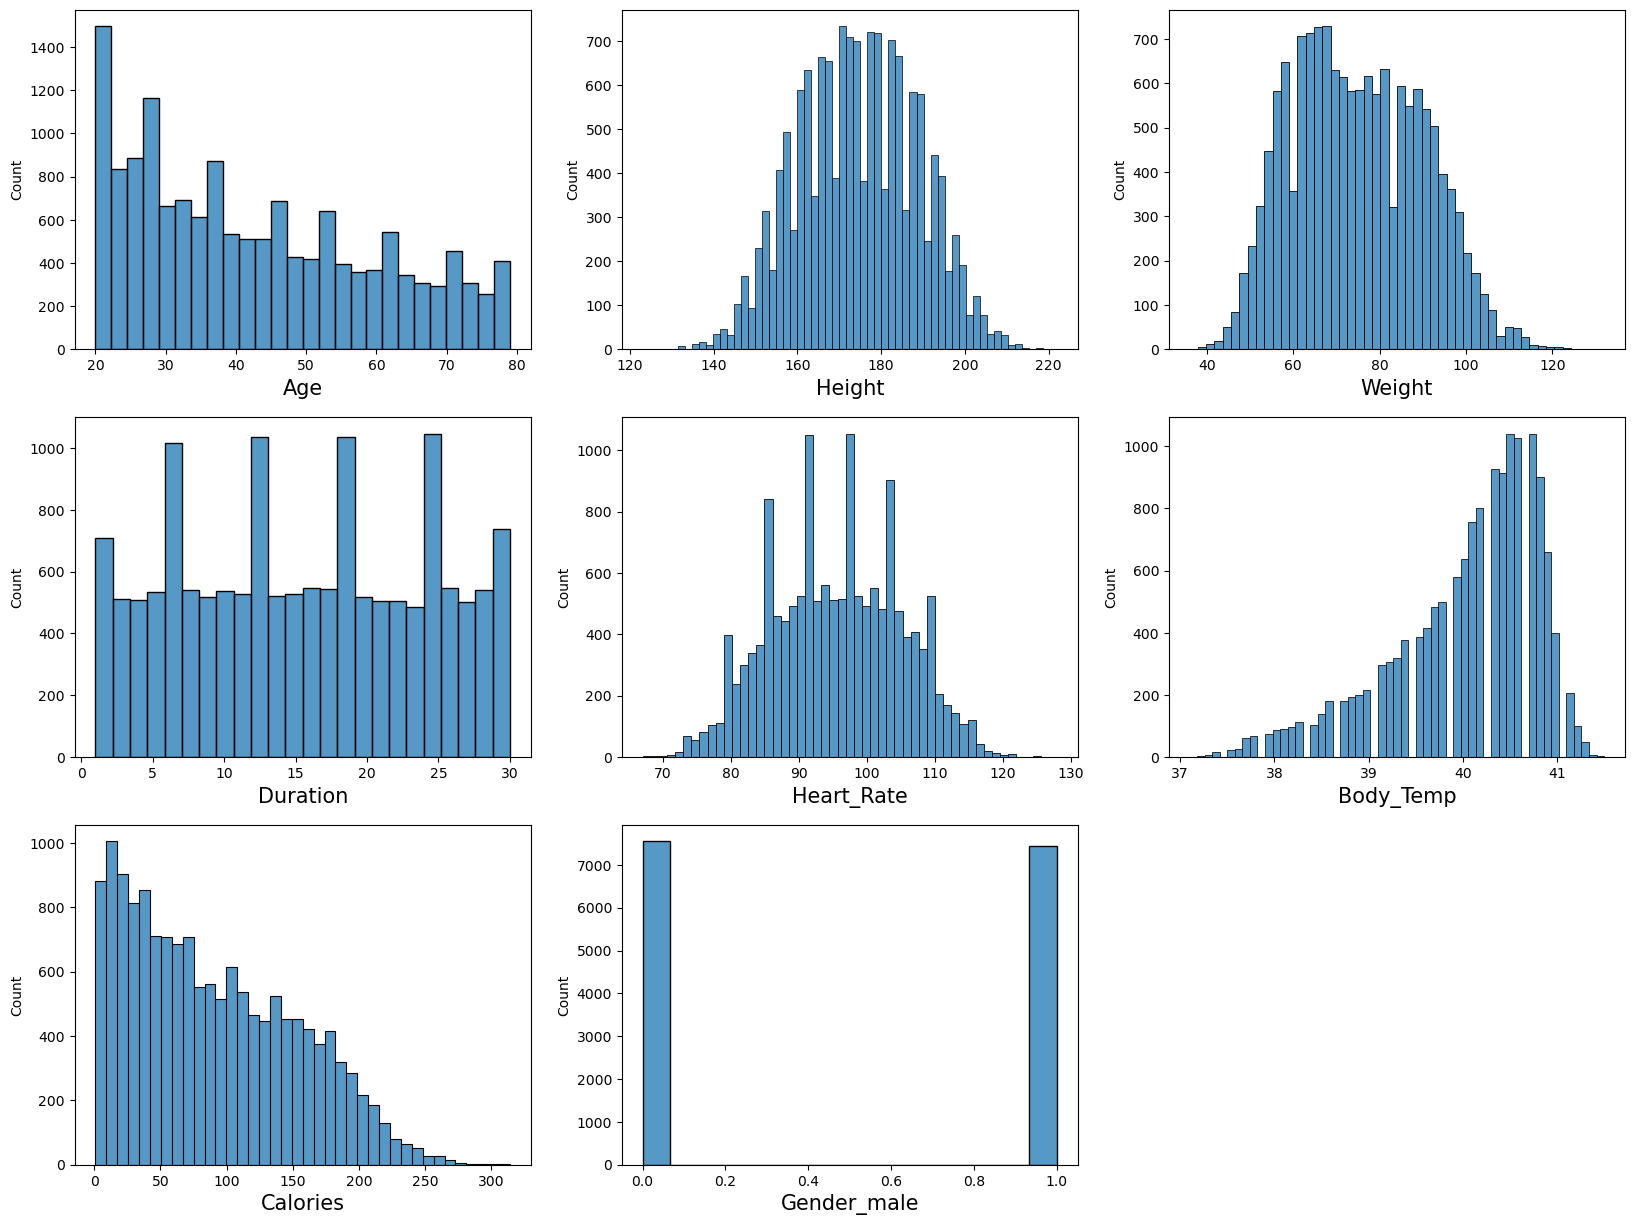

In [41]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

### Remove Outliers

In [42]:
def remove_outliers(data):

    columns =  data.columns
    
    for col in columns:
        if(data[col].dtype != bool):
            percent_25 =  data[col].quantile(0.25)
            percent_75 =  data[col].quantile(0.75)
            iqr  = percent_75 - percent_25
    
            lower_limit =  percent_25 - 1.5*iqr
            upper_limit =  percent_75 + 1.5*iqr
    
    
            data.loc[data[col]>upper_limit, col]=upper_limit
            data.loc[data[col]<lower_limit, col]=lower_limit


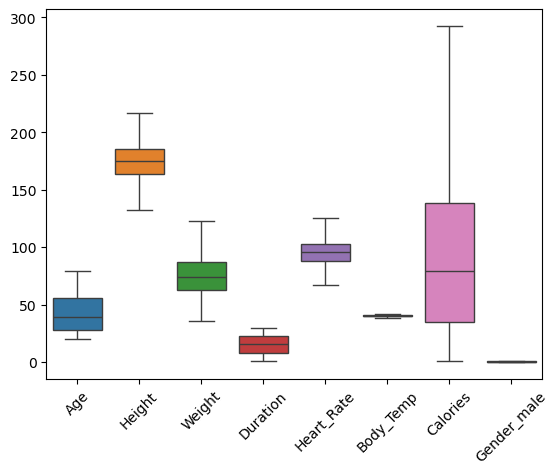

In [43]:
remove_outliers(data)
plt.figure()
sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

We can look at the correlation between the different variables

<Axes: >

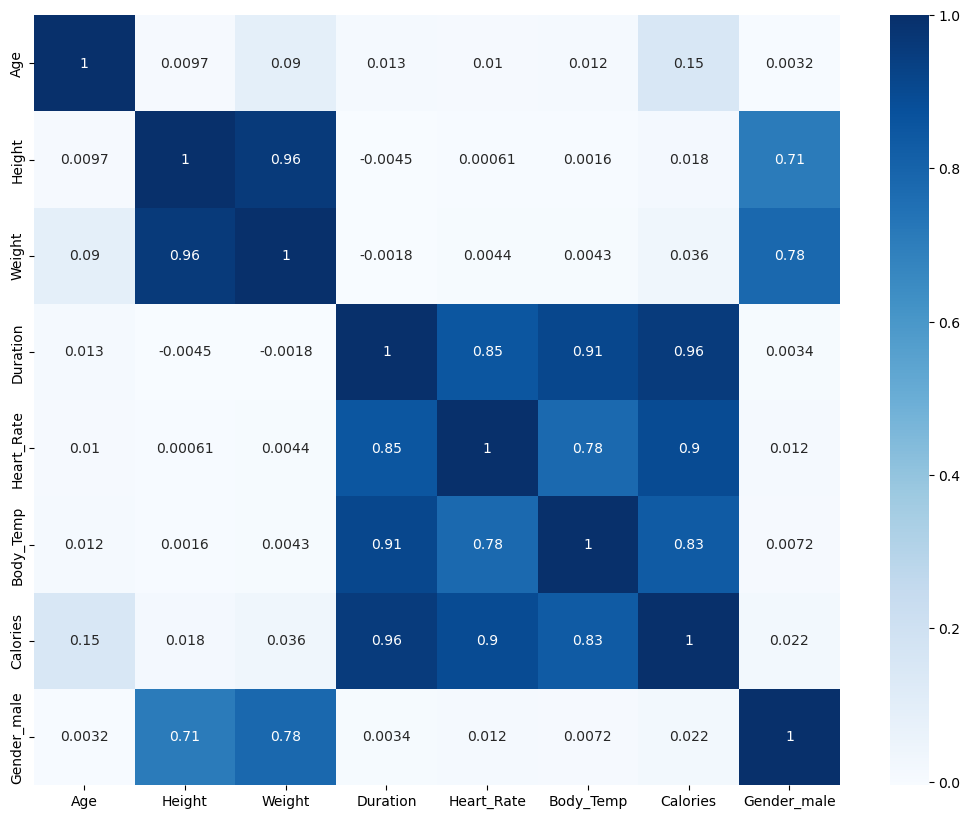

In [44]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap='Blues',annot = True)

### Split the data into train and test portions

In [45]:
X = data.drop(columns=["Calories"],axis =1)
y = data["Calories"]

In [46]:
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,True
1,20,166.0,60.0,14.0,94.0,40.3,False
2,69,179.0,79.0,5.0,88.0,38.7,True
3,34,179.0,71.0,13.0,100.0,40.5,False
4,27,154.0,58.0,10.0,81.0,39.8,False


In [47]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

### We fit the model into the data

In [49]:
%%time
model = LinearRegression()
model.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 128 ms


LinearRegression()

### Using the model that was fitted onto the data, we will now predict the value of y variable for the data in X_test

In [50]:
y_pred = model.predict(X_test)

### The model is fit and the different scoring metrics are used to compute the accuracy of the model

In [51]:
print('r^2 score: ',metrics.r2_score(y_test,y_pred))

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r^2 score:  0.9684002222782884
Mean Absolute Error: 8.183323193952344
Mean Square Error: 120.55113434145599
Root Mean Square Error: 10.979578058443593


The $r^2$ error is 0.968 which is a very high value and quite close to 1, which indicates that the prediction from the model is accurate

## The coefficients of each of the variables can be found out and printed below

In [52]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

             Coefficients
Age              0.498630
Height          -0.190920
Weight           0.318649
Duration         6.703694
Heart_Rate       2.004308
Body_Temp      -18.225506
Gender_male     -1.574682


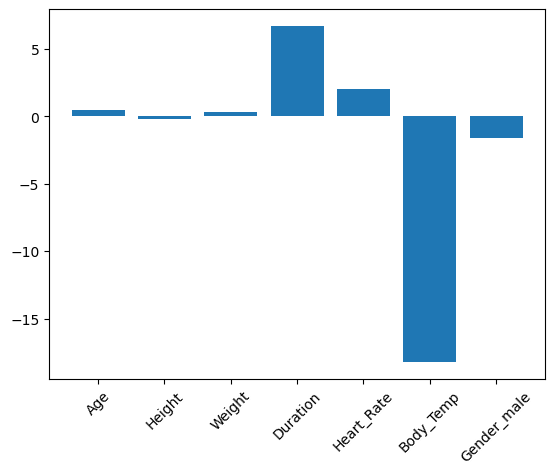

In [53]:
plt.figure()
plt.bar(X.columns, model.coef_)
plt.xticks(rotation=45)
plt.show()